In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Configuración visual
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Ruta para guardar visualizaciones
output_path = r"C:\Users\Samue\OneDrive\Desktop\Portfolio\credit-card-fraud-detection\visualizations"

# Cargar dataset
print("Cargando dataset...")
df = pd.read_csv(r"C:\Users\Samue\OneDrive\Desktop\Portfolio\credit-card-fraud-detection\dataset\creditcard.csv")
print("Dataset cargado exitosamente\n")

# Exploración básica
print("=" * 70)
print(" " * 20 + "INFORMACIÓN GENERAL DEL DATASET")
print("=" * 70)
print(f"\nDimensiones: {df.shape[0]:,} transacciones x {df.shape[1]} variables")
print(f"Tamaño en memoria: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\n" + "=" * 70)
print("PRIMERAS 5 TRANSACCIONES")
print("=" * 70)
print(df.head())

print("\n" + "=" * 70)
print("INFORMACIÓN DE COLUMNAS")
print("=" * 70)
print(df.info())

print("\n" + "=" * 70)
print("VALORES NULOS")
print("=" * 70)
print(f"Total valores nulos: {df.isnull().sum().sum()}")
if df.isnull().sum().sum() == 0:
    print("No hay valores nulos - Dataset limpio")

print("\n" + "=" * 70)
print("ESTADÍSTICAS DESCRIPTIVAS - TIME Y AMOUNT")
print("=" * 70)
print(df[['Time', 'Amount', 'Class']].describe())

print("\n" + "=" * 70)
print("DISTRIBUCIÓN DE LA VARIABLE OBJETIVO (Class)")
print("=" * 70)
fraud_counts = df['Class'].value_counts()
fraud_pct = df['Class'].value_counts(normalize=True) * 100

print(f"\nConteo absoluto:")
print(fraud_counts)
print(f"\nPorcentaje:")
print(fraud_pct)

print("\n" + "=" * 70)
print("RESUMEN DE DESBALANCE")
print("=" * 70)
legit = fraud_counts[0]
fraud = fraud_counts[1]
total = len(df)
print(f"Transacciones legítimas: {legit:,} ({fraud_pct[0]:.3f}%)")
print(f"Transacciones fraudulentas: {fraud:,} ({fraud_pct[1]:.3f}%)")
print(f"Ratio desbalance: 1 fraude por cada {int(legit/fraud)} transacciones legítimas")

Cargando dataset...
Dataset cargado exitosamente

                    INFORMACIÓN GENERAL DEL DATASET

Dimensiones: 284,807 transacciones x 31 variables
Tamaño en memoria: 67.36 MB

PRIMERAS 5 TRANSACCIONES
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281

               ANÁLISIS DE DISTRIBUCIÓN DE FRAUDE


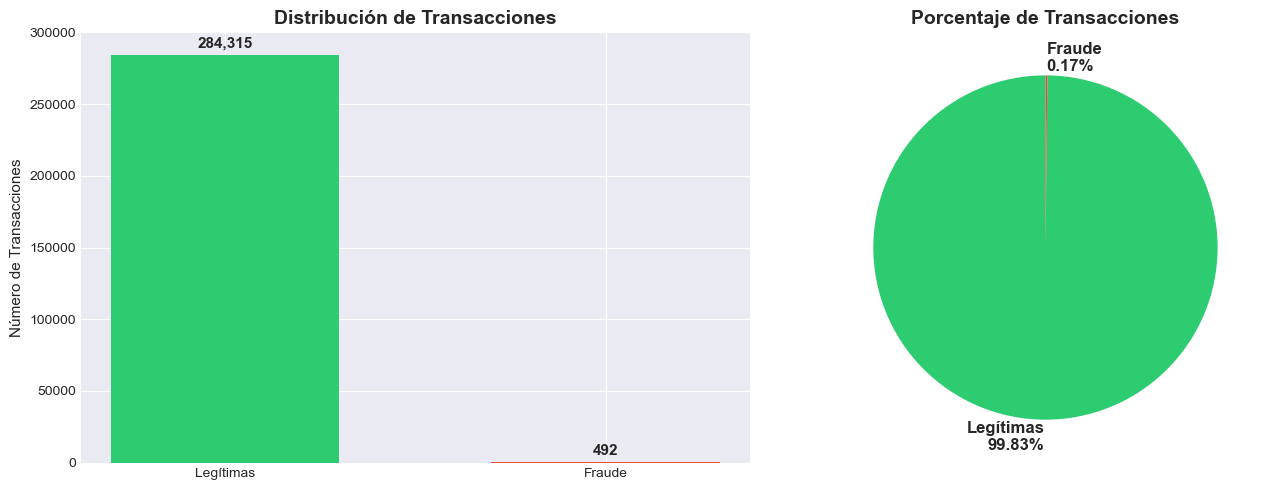


Gráfica guardada: grafica_1_distribucion_fraude.png

               ANÁLISIS DE MONTOS (AMOUNT)

Estadísticas de Amount por Clase:
          count        mean         std  min   25%    50%     75%       max
Class                                                                      
0      284315.0   88.291022  250.105092  0.0  5.65  22.00   77.05  25691.16
1         492.0  122.211321  256.683288  0.0  1.00   9.25  105.89   2125.87

ANÁLISIS COMPARATIVO:
Monto promedio (Legítimas): $88.29
Monto promedio (Fraude): $122.21
Diferencia promedio: $33.92 (38.4%)

Monto mediano (Legítimas): $22.00
Monto mediano (Fraude): $9.25


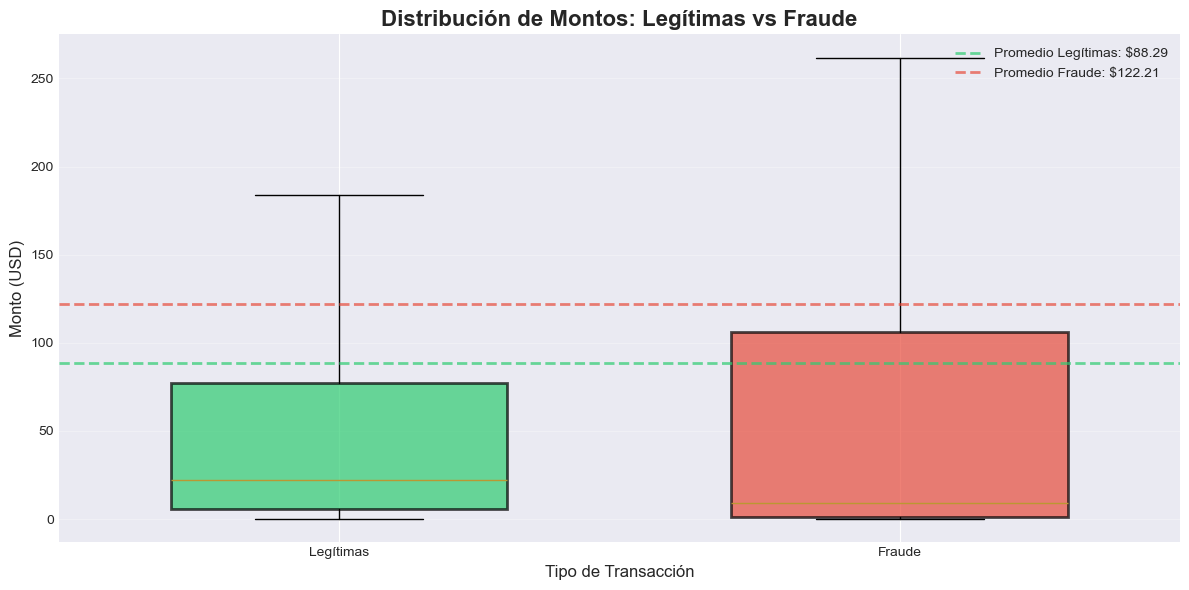


Gráfica guardada: grafica_2_montos_boxplot.png

DISTRIBUCIÓN DETALLADA DE MONTOS (HASTA $500)


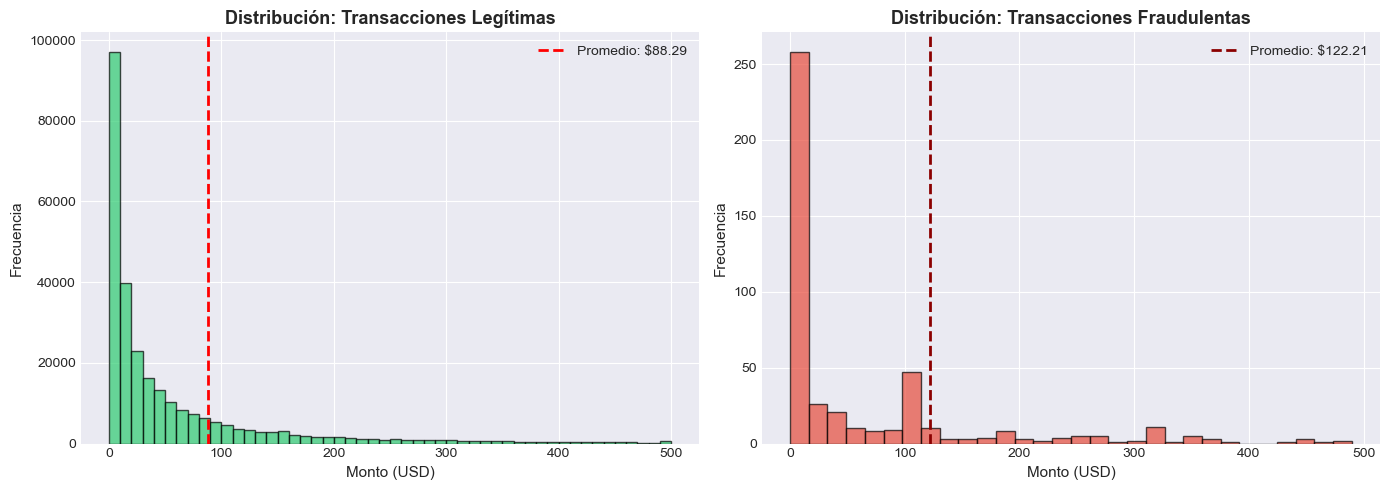


Gráfica guardada: grafica_3_distribucion_montos.png

Todas las gráficas guardadas en: C:\Users\Samue\OneDrive\Desktop\Portfolio\credit-card-fraud-detection\visualizations


In [6]:
# FASE 2: Análisis de Distribución y Montos

print("=" * 70)
print(" " * 15 + "ANÁLISIS DE DISTRIBUCIÓN DE FRAUDE")
print("=" * 70)

# Gráfica 1: Distribución de Class
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Subplot 1: Conteo absoluto
fraud_counts = df['Class'].value_counts()
colors = ['#2ecc71', '#e74c3c']
axes[0].bar(['Legítimas', 'Fraude'], fraud_counts.values, color=colors, width=0.6)
axes[0].set_title('Distribución de Transacciones', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Número de Transacciones', fontsize=11)
axes[0].set_ylim(0, 300000)

# Añadir valores
for i, v in enumerate(fraud_counts.values):
    axes[0].text(i, v + 5000, f'{v:,}', ha='center', fontweight='bold', fontsize=11)

# Subplot 2: Porcentaje (pie chart)
fraud_pct = df['Class'].value_counts(normalize=True) * 100
axes[1].pie(fraud_pct.values, labels=['Legítimas\n99.83%', 'Fraude\n0.17%'], 
            autopct='', colors=colors, startangle=90, textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[1].set_title('Porcentaje de Transacciones', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig(f'{output_path}/grafica_1_distribucion_fraude.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nGráfica guardada: grafica_1_distribucion_fraude.png")

# Análisis de montos
print("\n" + "=" * 70)
print(" " * 15 + "ANÁLISIS DE MONTOS (AMOUNT)")
print("=" * 70)

# Estadísticas por clase
amount_stats = df.groupby('Class')['Amount'].describe()
print("\nEstadísticas de Amount por Clase:")
print(amount_stats)

legit_mean = df[df['Class'] == 0]['Amount'].mean()
fraud_mean = df[df['Class'] == 1]['Amount'].mean()
legit_median = df[df['Class'] == 0]['Amount'].median()
fraud_median = df[df['Class'] == 1]['Amount'].median()

print(f"\nANÁLISIS COMPARATIVO:")
print(f"Monto promedio (Legítimas): ${legit_mean:.2f}")
print(f"Monto promedio (Fraude): ${fraud_mean:.2f}")
print(f"Diferencia promedio: ${fraud_mean - legit_mean:.2f} ({((fraud_mean/legit_mean - 1)*100):.1f}%)")
print(f"\nMonto mediano (Legítimas): ${legit_median:.2f}")
print(f"Monto mediano (Fraude): ${fraud_median:.2f}")

# Gráfica 2: Boxplot de montos
fig, ax = plt.subplots(figsize=(12, 6))

# Crear boxplot
bp = ax.boxplot([df[df['Class'] == 0]['Amount'], df[df['Class'] == 1]['Amount']],
                 labels=['Legítimas', 'Fraude'],
                 patch_artist=True,
                 widths=0.6,
                 showfliers=False)

# Colorear
bp['boxes'][0].set_facecolor('#2ecc71')
bp['boxes'][1].set_facecolor('#e74c3c')

for box in bp['boxes']:
    box.set_alpha(0.7)
    box.set_linewidth(2)

ax.set_title('Distribución de Montos: Legítimas vs Fraude', fontsize=16, fontweight='bold')
ax.set_ylabel('Monto (USD)', fontsize=12)
ax.set_xlabel('Tipo de Transacción', fontsize=12)
ax.grid(axis='y', alpha=0.3)

# Añadir líneas de promedio
ax.axhline(legit_mean, color='#2ecc71', linestyle='--', linewidth=2, 
           alpha=0.7, label=f'Promedio Legítimas: ${legit_mean:.2f}')
ax.axhline(fraud_mean, color='#e74c3c', linestyle='--', linewidth=2, 
           alpha=0.7, label=f'Promedio Fraude: ${fraud_mean:.2f}')
ax.legend(loc='upper right')

plt.tight_layout()
plt.savefig(f'{output_path}/grafica_2_montos_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nGráfica guardada: grafica_2_montos_boxplot.png")

# Análisis de distribución de montos (sin outliers extremos)
print("\n" + "=" * 70)
print("DISTRIBUCIÓN DETALLADA DE MONTOS (HASTA $500)")
print("=" * 70)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histograma legítimas
legit_amounts = df[df['Class'] == 0]['Amount']
legit_filtered = legit_amounts[legit_amounts <= 500]
axes[0].hist(legit_filtered, bins=50, color='#2ecc71', alpha=0.7, edgecolor='black')
axes[0].set_title('Distribución: Transacciones Legítimas', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Monto (USD)', fontsize=11)
axes[0].set_ylabel('Frecuencia', fontsize=11)
axes[0].axvline(legit_mean, color='red', linestyle='--', linewidth=2, label=f'Promedio: ${legit_mean:.2f}')
axes[0].legend()

# Histograma fraude
fraud_amounts = df[df['Class'] == 1]['Amount']
fraud_filtered = fraud_amounts[fraud_amounts <= 500]
axes[1].hist(fraud_filtered, bins=30, color='#e74c3c', alpha=0.7, edgecolor='black')
axes[1].set_title('Distribución: Transacciones Fraudulentas', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Monto (USD)', fontsize=11)
axes[1].set_ylabel('Frecuencia', fontsize=11)
axes[1].axvline(fraud_mean, color='darkred', linestyle='--', linewidth=2, label=f'Promedio: ${fraud_mean:.2f}')
axes[1].legend()

plt.tight_layout()
plt.savefig(f'{output_path}/grafica_3_distribucion_montos.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nGráfica guardada: grafica_3_distribucion_montos.png")
print(f"\nTodas las gráficas guardadas en: {output_path}")

               ANÁLISIS DE PATRONES TEMPORALES

Información de Time:
Time mínimo: 0.0 segundos (0 horas)
Time máximo: 172792.0 segundos (48.0 horas)
Período total: 48.0 horas (~2.0 días)

DISTRIBUCIÓN DE TRANSACCIONES POR HORA

Horas con MÁS transacciones totales:
Hour
21    17703
18    17039
11    16856
20    16756
10    16598
Name: Class, dtype: int64

Horas con MENOS transacciones totales:
Hour
4    2209
5    2990
2    3328
3    3492
6    4101
Name: Class, dtype: int64

DISTRIBUCIÓN DE FRAUDE POR HORA (Conteo Absoluto)

Top 5 horas con MÁS fraudes:
Hour
2     57
11    53
18    33
17    29
15    26
Name: Class, dtype: int64

Top 5 horas con MENOS fraudes:
Hour
0     6
10    8
6     9
8     9
22    9
Name: Class, dtype: int64

TASA DE FRAUDE POR HORA (% - NORMALIZADA POR VOLUMEN)

Horas con MAYOR tasa de fraude:
Hora 02:00 - 1.713% (57 fraudes de 3328 transacciones)
Hora 04:00 - 1.041% (23 fraudes de 2209 transacciones)
Hora 03:00 - 0.487% (17 fraudes de 3492 transacciones)
Hora 05:00

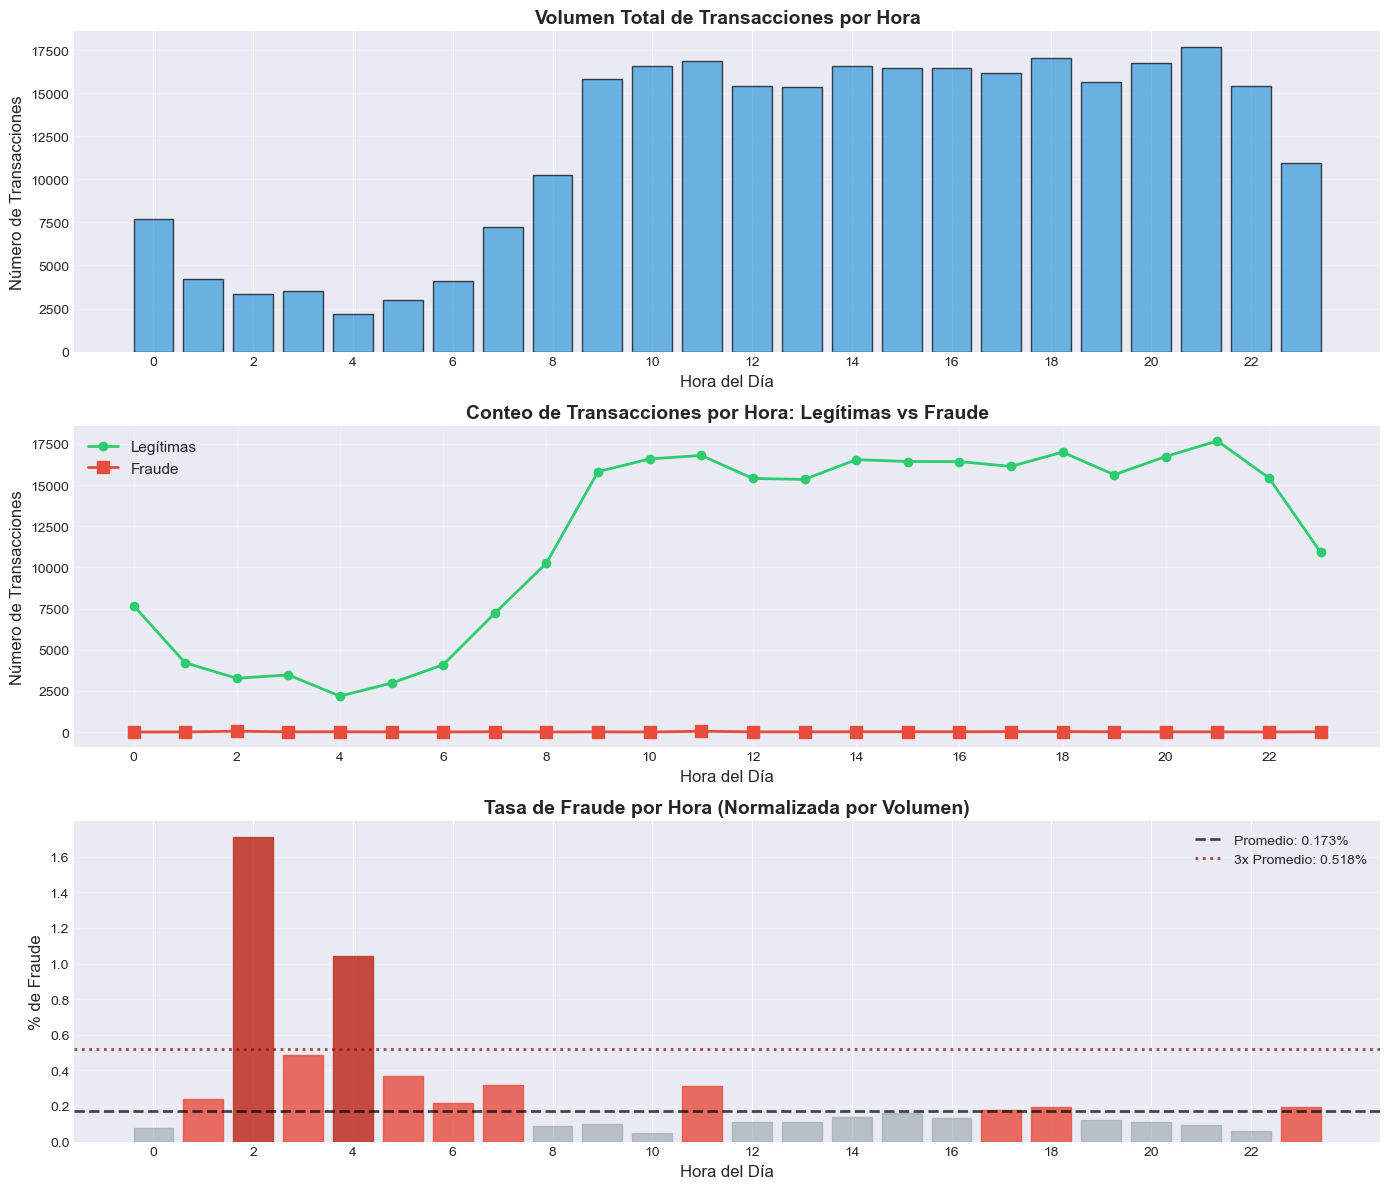


Gráfica guardada: grafica_4_patrones_temporales.png

ANÁLISIS DE VENTANAS DE RIESGO

Promedio general de fraude: 0.173%

HORAS DE RIESGO CRÍTICO (>3x promedio):
Horas: [2, 4]
Tasa promedio en estas horas: 1.377%

HORAS DE RIESGO ELEVADO (1x-3x promedio):
Horas: [1, 3, 5, 6, 7, 11, 17, 18, 23]
Tasa promedio en estas horas: 0.279%

HORAS DE RIESGO NORMAL (<1x promedio):
Horas: [0, 8, 9, 10, 12, 13, 14, 15, 16, 19, 20, 21, 22]
Tasa promedio en estas horas: 0.103%

HALLAZGOS CLAVE - PATRONES TEMPORALES

1. Hora MÁS PELIGROSA: 02:00 con 1.713% de fraude
   - 9.9x más riesgo que el promedio

2. Hora MÁS SEGURA: 10:00 con 0.048% de fraude

3. Ventana de alto riesgo: 02:00 - 04:00

4. Impacto: 2 horas (8.3% del día) tienen riesgo crítico


In [10]:
# FASE 3: Análisis de Patrones Temporales (CORREGIDO)

print("=" * 70)
print(" " * 15 + "ANÁLISIS DE PATRONES TEMPORALES")
print("=" * 70)

# Convertir Time (segundos) a horas
df['Hour'] = (df['Time'] / 3600) % 24

print("\nInformación de Time:")
print(f"Time mínimo: {df['Time'].min()} segundos (0 horas)")
print(f"Time máximo: {df['Time'].max()} segundos ({df['Time'].max()/3600:.1f} horas)")
print(f"Período total: {df['Time'].max()/3600:.1f} horas (~{df['Time'].max()/3600/24:.1f} días)")

# Análisis de fraude por hora
fraud_by_hour = df[df['Class'] == 1].groupby(df['Hour'].astype(int))['Class'].count()
legit_by_hour = df[df['Class'] == 0].groupby(df['Hour'].astype(int))['Class'].count()
total_by_hour = df.groupby(df['Hour'].astype(int))['Class'].count()

print("\n" + "=" * 70)
print("DISTRIBUCIÓN DE TRANSACCIONES POR HORA")
print("=" * 70)
print("\nHoras con MÁS transacciones totales:")
print(total_by_hour.sort_values(ascending=False).head())

print("\nHoras con MENOS transacciones totales:")
print(total_by_hour.sort_values(ascending=True).head())

print("\n" + "=" * 70)
print("DISTRIBUCIÓN DE FRAUDE POR HORA (Conteo Absoluto)")
print("=" * 70)
print("\nTop 5 horas con MÁS fraudes:")
print(fraud_by_hour.sort_values(ascending=False).head())

print("\nTop 5 horas con MENOS fraudes:")
print(fraud_by_hour.sort_values(ascending=True).head())

# Calcular tasa de fraude por hora (normalizada)
fraud_rate_by_hour = (fraud_by_hour / total_by_hour * 100).fillna(0)

print("\n" + "=" * 70)
print("TASA DE FRAUDE POR HORA (% - NORMALIZADA POR VOLUMEN)")
print("=" * 70)
print("\nHoras con MAYOR tasa de fraude:")
top_fraud_hours = fraud_rate_by_hour.sort_values(ascending=False).head(10)
for hour, rate in top_fraud_hours.items():
    total = total_by_hour.get(hour, 0)
    frauds = fraud_by_hour.get(hour, 0)
    print(f"Hora {int(hour):02d}:00 - {rate:.3f}% ({frauds} fraudes de {total} transacciones)")

print("\nHoras con MENOR tasa de fraude:")
bottom_fraud_hours = fraud_rate_by_hour.sort_values(ascending=True).head(5)
for hour, rate in bottom_fraud_hours.items():
    total = total_by_hour.get(hour, 0)
    frauds = fraud_by_hour.get(hour, 0)
    print(f"Hora {int(hour):02d}:00 - {rate:.3f}% ({frauds} fraudes de {total} transacciones)")

# Gráfica 4: Distribución temporal de fraude (3 subplots)
fig, axes = plt.subplots(3, 1, figsize=(14, 12))

hours = range(24)

# Subplot 1: Volumen total de transacciones por hora
axes[0].bar(hours, [total_by_hour.get(h, 0) for h in hours], 
            color='#3498db', alpha=0.7, edgecolor='black')
axes[0].set_title('Volumen Total de Transacciones por Hora', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Hora del Día', fontsize=12)
axes[0].set_ylabel('Número de Transacciones', fontsize=12)
axes[0].grid(axis='y', alpha=0.3)
axes[0].set_xticks(range(0, 24, 2))

# Subplot 2: Conteo de fraudes vs legítimas
axes[1].plot(hours, [legit_by_hour.get(h, 0) for h in hours], 
             marker='o', linewidth=2, markersize=6, color='#2ecc71', label='Legítimas')
axes[1].plot(hours, [fraud_by_hour.get(h, 0) for h in hours], 
             marker='s', linewidth=2, markersize=8, color='#e74c3c', label='Fraude', zorder=5)
axes[1].set_title('Conteo de Transacciones por Hora: Legítimas vs Fraude', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Hora del Día', fontsize=12)
axes[1].set_ylabel('Número de Transacciones', fontsize=12)
axes[1].legend(fontsize=11)
axes[1].grid(alpha=0.3)
axes[1].set_xticks(range(0, 24, 2))

# Subplot 3: Tasa de fraude por hora (normalizada)
bars = axes[2].bar(hours, [fraud_rate_by_hour.get(h, 0) for h in hours], 
                   color='#e74c3c', alpha=0.7, edgecolor='black')

# Colorear barras según nivel de riesgo
avg_fraud_rate = (df['Class'].sum() / len(df)) * 100
for i, (h, bar) in enumerate(zip(hours, bars)):
    rate = fraud_rate_by_hour.get(h, 0)
    if rate > avg_fraud_rate * 3:  # 3x el promedio
        bar.set_color('#c0392b')  # Rojo oscuro
        bar.set_alpha(0.9)
    elif rate > avg_fraud_rate:
        bar.set_color('#e74c3c')  # Rojo
        bar.set_alpha(0.8)
    else:
        bar.set_color('#95a5a6')  # Gris
        bar.set_alpha(0.6)

axes[2].set_title('Tasa de Fraude por Hora (Normalizada por Volumen)', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Hora del Día', fontsize=12)
axes[2].set_ylabel('% de Fraude', fontsize=12)
axes[2].grid(axis='y', alpha=0.3)
axes[2].set_xticks(range(0, 24, 2))

# Añadir líneas de referencia
axes[2].axhline(avg_fraud_rate, color='black', linestyle='--', linewidth=2, 
                alpha=0.7, label=f'Promedio: {avg_fraud_rate:.3f}%')
axes[2].axhline(avg_fraud_rate * 3, color='darkred', linestyle=':', linewidth=2, 
                alpha=0.7, label=f'3x Promedio: {avg_fraud_rate*3:.3f}%')
axes[2].legend()

plt.tight_layout()
plt.savefig(f'{output_path}/grafica_4_patrones_temporales.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nGráfica guardada: grafica_4_patrones_temporales.png")

# Identificar ventanas de riesgo
print("\n" + "=" * 70)
print("ANÁLISIS DE VENTANAS DE RIESGO")
print("=" * 70)

high_risk_hours = fraud_rate_by_hour[fraud_rate_by_hour > avg_fraud_rate * 3].index.tolist()
medium_risk_hours = fraud_rate_by_hour[(fraud_rate_by_hour > avg_fraud_rate) & 
                                       (fraud_rate_by_hour <= avg_fraud_rate * 3)].index.tolist()
low_risk_hours = fraud_rate_by_hour[fraud_rate_by_hour <= avg_fraud_rate].index.tolist()

print(f"\nPromedio general de fraude: {avg_fraud_rate:.3f}%")
print(f"\nHORAS DE RIESGO CRÍTICO (>3x promedio):")
print(f"Horas: {sorted([int(h) for h in high_risk_hours])}")
print(f"Tasa promedio en estas horas: {fraud_rate_by_hour[high_risk_hours].mean():.3f}%")

print(f"\nHORAS DE RIESGO ELEVADO (1x-3x promedio):")
print(f"Horas: {sorted([int(h) for h in medium_risk_hours])}")
print(f"Tasa promedio en estas horas: {fraud_rate_by_hour[medium_risk_hours].mean():.3f}%")

print(f"\nHORAS DE RIESGO NORMAL (<1x promedio):")
print(f"Horas: {sorted([int(h) for h in low_risk_hours])}")
print(f"Tasa promedio en estas horas: {fraud_rate_by_hour[low_risk_hours].mean():.3f}%")

# Resumen de hallazgos
print("\n" + "=" * 70)
print("HALLAZGOS CLAVE - PATRONES TEMPORALES")
print("=" * 70)

peak_hour = fraud_rate_by_hour.idxmax()
peak_rate = fraud_rate_by_hour.max()
safest_hour = fraud_rate_by_hour.idxmin()
safest_rate = fraud_rate_by_hour.min()

print(f"\n1. Hora MÁS PELIGROSA: {int(peak_hour):02d}:00 con {peak_rate:.3f}% de fraude")
print(f"   - {peak_rate/avg_fraud_rate:.1f}x más riesgo que el promedio")

print(f"\n2. Hora MÁS SEGURA: {int(safest_hour):02d}:00 con {safest_rate:.3f}% de fraude")

print(f"\n3. Ventana de alto riesgo: {min([int(h) for h in high_risk_hours]):02d}:00 - {max([int(h) for h in high_risk_hours]):02d}:00")

print(f"\n4. Impacto: {len(high_risk_hours)} horas ({len(high_risk_hours)/24*100:.1f}% del día) tienen riesgo crítico")

               ANÁLISIS DE CORRELACIONES CON FRAUDE

Top 10 variables con MAYOR correlación positiva con fraude:
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
Name: Class, dtype: float64

Top 10 variables con MAYOR correlación negativa (protección contra fraude):
V9    -0.097733
V1    -0.101347
V18   -0.111485
V7    -0.187257
V3    -0.192961
V16   -0.196539
V10   -0.216883
V12   -0.260593
V14   -0.302544
V17   -0.326481
Name: Class, dtype: float64


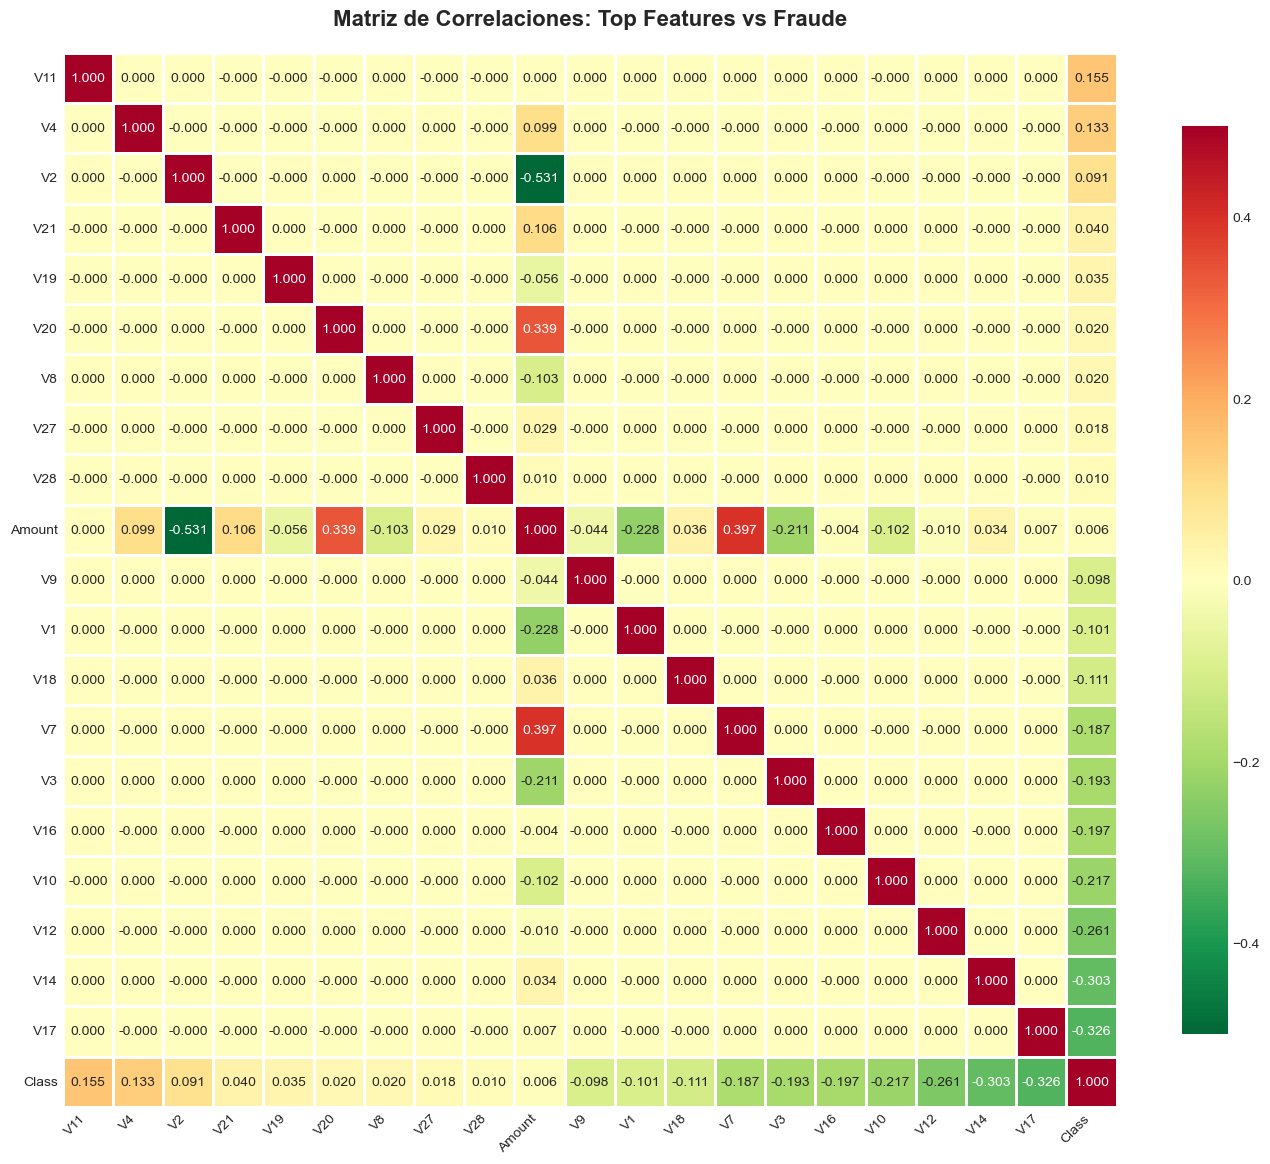


Gráfica guardada: grafica_5_heatmap_correlaciones.png

ANÁLISIS DETALLADO: TOP 3 FEATURES

V11:
  Correlación con fraude: 0.1549
  Legítimas - Media: -0.0066, Std: 1.0031
  Fraude    - Media: 3.8002, Std: 2.6786
  Diferencia: 3.8067

V4:
  Correlación con fraude: 0.1334
  Legítimas - Media: -0.0079, Std: 1.3993
  Fraude    - Media: 4.5420, Std: 2.8733
  Diferencia: 4.5499

V2:
  Correlación con fraude: 0.0913
  Legítimas - Media: -0.0063, Std: 1.6361
  Fraude    - Media: 3.6238, Std: 4.2912
  Diferencia: 3.6300


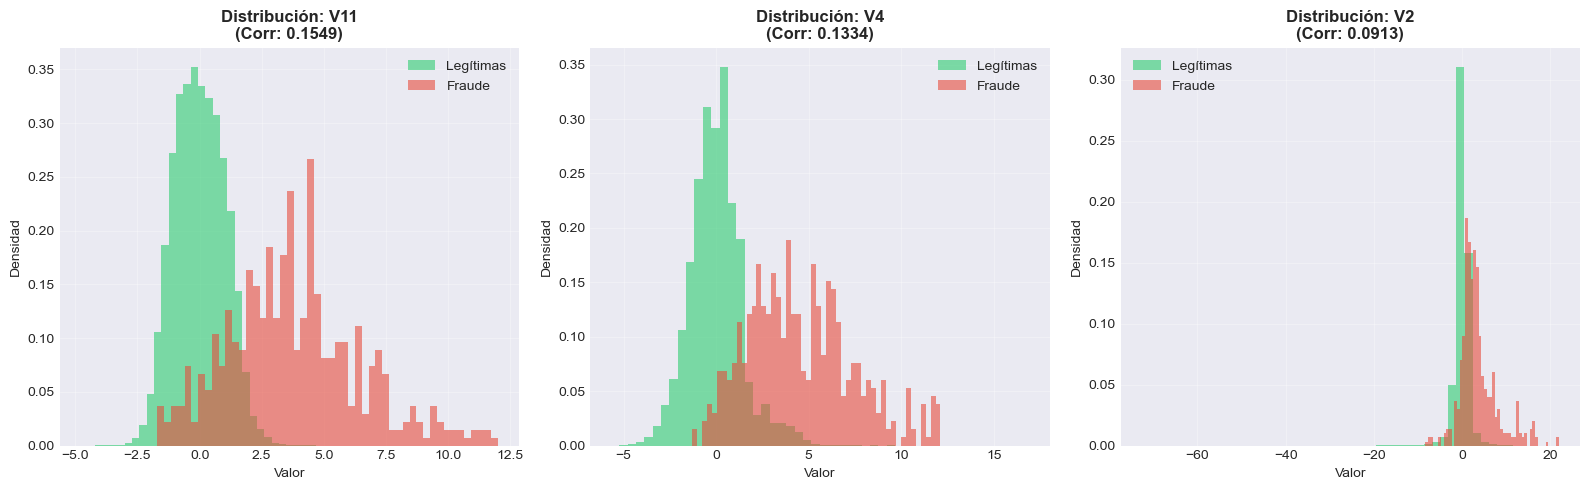


Gráfica guardada: grafica_6_top3_features.png

RESUMEN: VARIABLES PREDICTORAS DE FRAUDE

Variables que AUMENTAN probabilidad de fraude:
  1. V11: 0.1549
  2. V4: 0.1334
  3. V2: 0.0913
  4. V21: 0.0404
  5. V19: 0.0348

Variables que REDUCEN probabilidad de fraude:
  1. V17: -0.3265
  2. V14: -0.3025
  3. V12: -0.2606
  4. V10: -0.2169
  5. V16: -0.1965


In [11]:
# FASE 4: Heatmap de Correlaciones

print("=" * 70)
print(" " * 15 + "ANÁLISIS DE CORRELACIONES CON FRAUDE")
print("=" * 70)

# Seleccionar top variables para correlación
# V1-V28 son anónimas (PCA), pero podemos identificar las más importantes
feature_cols = [f'V{i}' for i in range(1, 29)]
correlation_data = df[feature_cols + ['Amount', 'Hour', 'Class']].copy()

# Calcular correlaciones con Class
correlations = correlation_data.corr()['Class'].sort_values(ascending=False)

print("\nTop 10 variables con MAYOR correlación positiva con fraude:")
print(correlations[1:11])

print("\nTop 10 variables con MAYOR correlación negativa (protección contra fraude):")
print(correlations[-10:])

# Identificar variables clave
top_positive = correlations[1:11].index.tolist()
top_negative = correlations[-10:].index.tolist()
key_features = top_positive + top_negative

# Heatmap solo de variables clave
fig, ax = plt.subplots(figsize=(14, 12))

# Correlaciones entre variables clave y Class
key_corr_matrix = correlation_data[key_features + ['Class']].corr()

sns.heatmap(key_corr_matrix, annot=True, fmt='.3f', cmap='RdYlGn_r', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            ax=ax, vmin=-0.5, vmax=0.5)

ax.set_title('Matriz de Correlaciones: Top Features vs Fraude', 
             fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.savefig(f'{output_path}/grafica_5_heatmap_correlaciones.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nGráfica guardada: grafica_5_heatmap_correlaciones.png")

# Análisis de las top 3 variables
print("\n" + "=" * 70)
print("ANÁLISIS DETALLADO: TOP 3 FEATURES")
print("=" * 70)

top_3_features = correlations[1:4].index.tolist()

for feature in top_3_features:
    corr_value = correlations[feature]
    
    print(f"\n{feature}:")
    print(f"  Correlación con fraude: {corr_value:.4f}")
    
    # Estadísticas por clase
    legit_stats = df[df['Class'] == 0][feature].describe()
    fraud_stats = df[df['Class'] == 1][feature].describe()
    
    print(f"  Legítimas - Media: {legit_stats['mean']:.4f}, Std: {legit_stats['std']:.4f}")
    print(f"  Fraude    - Media: {fraud_stats['mean']:.4f}, Std: {fraud_stats['std']:.4f}")
    print(f"  Diferencia: {abs(fraud_stats['mean'] - legit_stats['mean']):.4f}")

# Gráfica de distribuciones de top 3 features
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

for i, feature in enumerate(top_3_features):
    # Histogramas
    legit_data = df[df['Class'] == 0][feature]
    fraud_data = df[df['Class'] == 1][feature]
    
    axes[i].hist(legit_data, bins=50, alpha=0.6, color='#2ecc71', 
                 label='Legítimas', density=True)
    axes[i].hist(fraud_data, bins=50, alpha=0.6, color='#e74c3c', 
                 label='Fraude', density=True)
    
    axes[i].set_title(f'Distribución: {feature}\n(Corr: {correlations[feature]:.4f})', 
                      fontsize=12, fontweight='bold')
    axes[i].set_xlabel('Valor', fontsize=10)
    axes[i].set_ylabel('Densidad', fontsize=10)
    axes[i].legend()
    axes[i].grid(alpha=0.3)

plt.tight_layout()
plt.savefig(f'{output_path}/grafica_6_top3_features.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nGráfica guardada: grafica_6_top3_features.png")

# Resumen de features importantes
print("\n" + "=" * 70)
print("RESUMEN: VARIABLES PREDICTORAS DE FRAUDE")
print("=" * 70)

print(f"\nVariables que AUMENTAN probabilidad de fraude:")
for i, feature in enumerate(top_positive[:5], 1):
    print(f"  {i}. {feature}: {correlations[feature]:.4f}")

print(f"\nVariables que REDUCEN probabilidad de fraude:")
for i, feature in enumerate(reversed(top_negative[-5:]), 1):
    print(f"  {i}. {feature}: {correlations[feature]:.4f}")

          SISTEMA DE SCORING DE RIESGO DE FRAUDE

UMBRALES DE RIESGO (basados en percentil 25 de fraudes):
V11: >1.97 = Alto riesgo
V4: >2.37 = Alto riesgo
V2: >1.19 = Alto riesgo

DISTRIBUCIÓN DE RISK SCORE

Estadísticas por clase:
          count       mean        std  min    25%   50%   75%   max
Class                                                              
0      284315.0   3.774018   8.528433  0.0   0.00   0.0   0.0  70.0
1         492.0  47.500000  23.898334  0.0  33.75  60.0  70.0  70.0

DISTRIBUCIÓN POR CATEGORÍA DE RIESGO

Porcentaje de fraude por categoría:
Class                  0          1
Risk_Category                      
Bajo           99.963916   0.036084
Medio          98.065395   1.934605
Alto           25.816024  74.183976

Conteo por categoría:
Class               0    1
Risk_Category             
Bajo           277030  100
Medio            7198  142
Alto               87  250


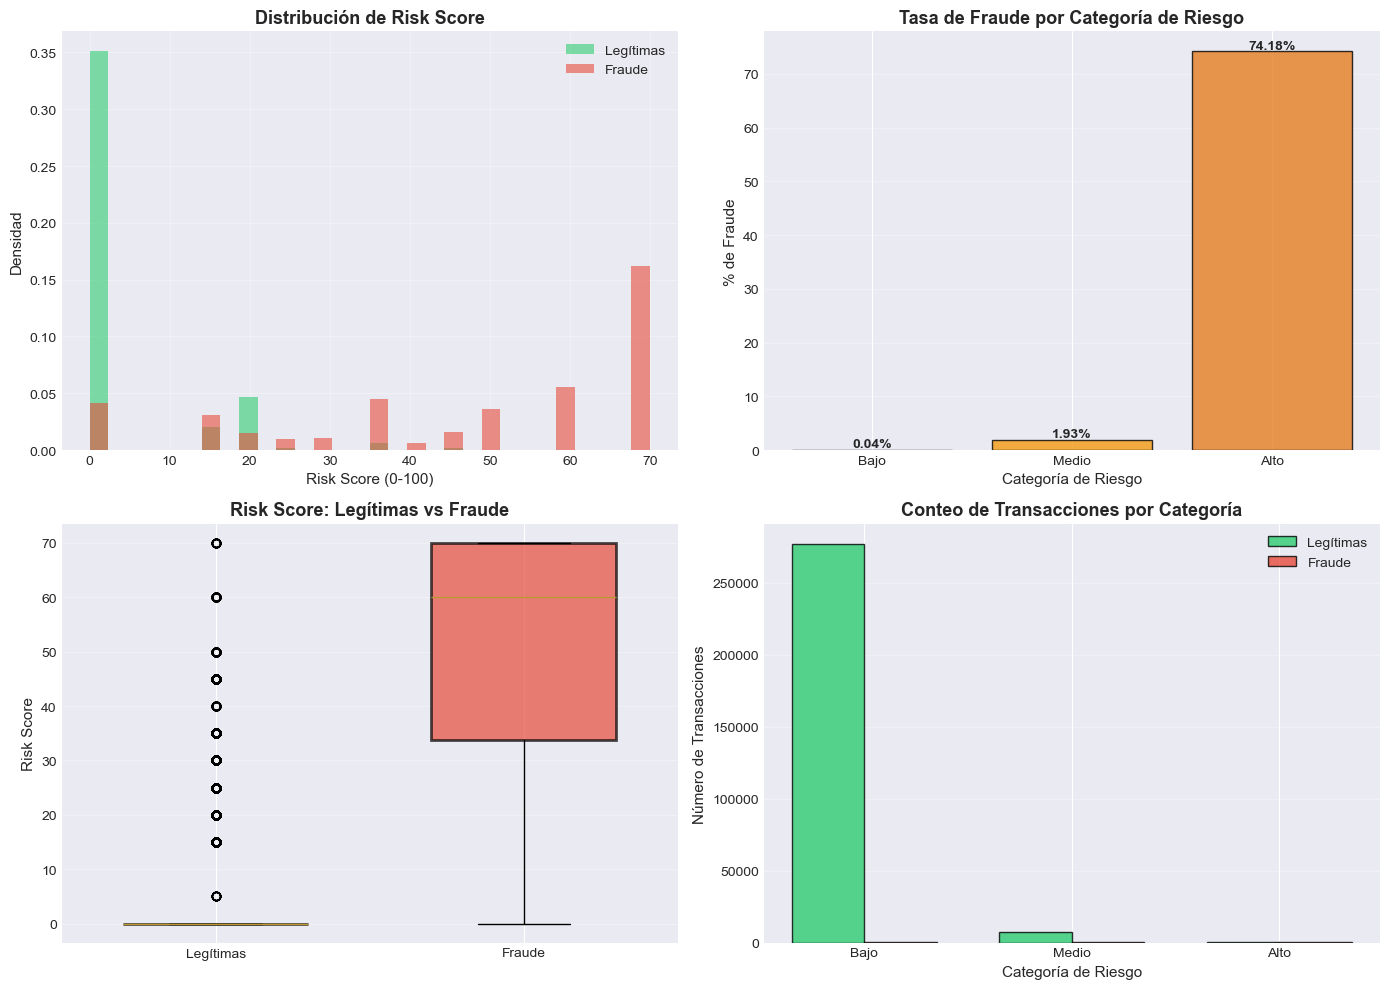


Gráfica guardada: grafica_7_risk_scoring.png

EVALUACIÓN DEL SISTEMA DE SCORING

Rendimiento por umbral de decisión:
Umbral     Fraudes      Total        Precisión    Cobertura
------------------------------------------------------------
20         409          38431        1.06         83.13%
40         317          1875         16.91        64.43%
60         250          337          74.18        50.81%
80         0            0            0.00         0.00%

PERFIL DE TRANSACCIÓN DE ALTO RIESGO

Transacciones de alto riesgo (Score >=60) que son fraude: 250
Porcentaje del total de fraudes: 50.8%

Características promedio:
  Hour: 19:00 (más común)
  V11: 5.63
  V4: 6.59
  V2: 6.33
  Amount: $65.56


In [17]:
# FASE 5: Sistema de Scoring de Riesgo y Perfil de Alto Riesgo
import pandas as pd
import numpy as np

print("=" * 70)
print(" " * 10 + "SISTEMA DE SCORING DE RIESGO DE FRAUDE")
print("=" * 70)

# Definir umbrales basados en análisis previo
top_fraud_features = ['V11', 'V4', 'V2', 'V17', 'V14', 'V12']

# Calcular percentil 25 de transacciones fraudulentas para cada variable
fraud_data = df[df['Class'] == 1]
legit_data = df[df['Class'] == 0]

print("\nUMBRALES DE RIESGO (basados en percentil 25 de fraudes):")
for feature in ['V11', 'V4', 'V2']:
    threshold = fraud_data[feature].quantile(0.25)
    print(f"{feature}: >{threshold:.2f} = Alto riesgo")

# Crear sistema de scoring
df['Risk_Score'] = 0

# Scoring basado en top features (0-100 puntos)
# Factor temporal (0-30 puntos)
df.loc[df['Hour'].isin([2, 3, 4]), 'Risk_Score'] += 30
df.loc[df['Hour'].isin([1, 5, 6, 7]), 'Risk_Score'] += 15
df.loc[df['Hour'].isin([11, 17, 18, 23]), 'Risk_Score'] += 5

# Factor V11 (0-25 puntos)
v11_threshold_high = fraud_data['V11'].quantile(0.25)
v11_threshold_critical = fraud_data['V11'].quantile(0.50)
df.loc[df['V11'] > v11_threshold_high, 'Risk_Score'] += 15
df.loc[df['V11'] > v11_threshold_critical, 'Risk_Score'] += 10

# Factor V4 (0-25 puntos)
v4_threshold_high = fraud_data['V4'].quantile(0.25)
v4_threshold_critical = fraud_data['V4'].quantile(0.50)
df.loc[df['V4'] > v4_threshold_high, 'Risk_Score'] += 15
df.loc[df['V4'] > v4_threshold_critical, 'Risk_Score'] += 10

# Factor V2 (0-20 puntos)
v2_threshold = fraud_data['V2'].quantile(0.25)
df.loc[df['V2'] > v2_threshold, 'Risk_Score'] += 20

# Análisis de scoring
print("\n" + "=" * 70)
print("DISTRIBUCIÓN DE RISK SCORE")
print("=" * 70)

print("\nEstadísticas por clase:")
print(df.groupby('Class')['Risk_Score'].describe())

# Definir categorías de riesgo
df['Risk_Category'] = pd.cut(df['Risk_Score'], 
                               bins=[-1, 20, 50, 80, 100],
                               labels=['Bajo', 'Medio', 'Alto', 'Crítico'])

print("\n" + "=" * 70)
print("DISTRIBUCIÓN POR CATEGORÍA DE RIESGO")
print("=" * 70)

risk_distribution = pd.crosstab(df['Risk_Category'], df['Class'], normalize='index') * 100
print("\nPorcentaje de fraude por categoría:")
print(risk_distribution)

# Estadísticas por categoría
print("\nConteo por categoría:")
category_counts = pd.crosstab(df['Risk_Category'], df['Class'])
print(category_counts)

# Gráfica 7: Distribución de Risk Score
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Subplot 1: Histograma de Risk Score
axes[0, 0].hist(df[df['Class'] == 0]['Risk_Score'], bins=30, alpha=0.6, 
                color='#2ecc71', label='Legítimas', density=True)
axes[0, 0].hist(df[df['Class'] == 1]['Risk_Score'], bins=30, alpha=0.6, 
                color='#e74c3c', label='Fraude', density=True)
axes[0, 0].set_title('Distribución de Risk Score', fontsize=13, fontweight='bold')
axes[0, 0].set_xlabel('Risk Score (0-100)', fontsize=11)
axes[0, 0].set_ylabel('Densidad', fontsize=11)
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Subplot 2: Tasa de fraude por categoría
risk_fraud_rate = (category_counts[1] / category_counts.sum(axis=1) * 100)
colors_map = {'Bajo': '#95a5a6', 'Medio': '#f39c12', 'Alto': '#e67e22', 'Crítico': '#c0392b'}
colors_risk = [colors_map[cat] for cat in risk_fraud_rate.index]

axes[0, 1].bar(range(len(risk_fraud_rate)), risk_fraud_rate.values, 
               color=colors_risk, edgecolor='black', alpha=0.8)
axes[0, 1].set_title('Tasa de Fraude por Categoría de Riesgo', fontsize=13, fontweight='bold')
axes[0, 1].set_xlabel('Categoría de Riesgo', fontsize=11)
axes[0, 1].set_ylabel('% de Fraude', fontsize=11)
axes[0, 1].set_xticks(range(len(risk_fraud_rate)))
axes[0, 1].set_xticklabels(risk_fraud_rate.index)
axes[0, 1].grid(axis='y', alpha=0.3)

# Añadir valores en barras
for i, v in enumerate(risk_fraud_rate.values):
    axes[0, 1].text(i, v + 0.5, f'{v:.2f}%', ha='center', fontweight='bold')

# Subplot 3: Boxplot de Risk Score por clase
bp = axes[1, 0].boxplot([df[df['Class'] == 0]['Risk_Score'], 
                          df[df['Class'] == 1]['Risk_Score']],
                         labels=['Legítimas', 'Fraude'],
                         patch_artist=True,
                         widths=0.6)
bp['boxes'][0].set_facecolor('#2ecc71')
bp['boxes'][1].set_facecolor('#e74c3c')
for box in bp['boxes']:
    box.set_alpha(0.7)
    box.set_linewidth(2)

axes[1, 0].set_title('Risk Score: Legítimas vs Fraude', fontsize=13, fontweight='bold')
axes[1, 0].set_ylabel('Risk Score', fontsize=11)
axes[1, 0].grid(axis='y', alpha=0.3)

# Subplot 4: Conteo por categoría
x = np.arange(len(category_counts))
width = 0.35
axes[1, 1].bar(x - width/2, category_counts[0], width, label='Legítimas', 
               color='#2ecc71', alpha=0.8, edgecolor='black')
axes[1, 1].bar(x + width/2, category_counts[1], width, label='Fraude', 
               color='#e74c3c', alpha=0.8, edgecolor='black')
axes[1, 1].set_title('Conteo de Transacciones por Categoría', fontsize=13, fontweight='bold')
axes[1, 1].set_xlabel('Categoría de Riesgo', fontsize=11)
axes[1, 1].set_ylabel('Número de Transacciones', fontsize=11)
axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels(category_counts.index)
axes[1, 1].legend()
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig(f'{output_path}/grafica_7_risk_scoring.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nGráfica guardada: grafica_7_risk_scoring.png")

# Evaluación del sistema
print("\n" + "=" * 70)
print("EVALUACIÓN DEL SISTEMA DE SCORING")
print("=" * 70)

# Calcular métricas para diferentes umbrales
thresholds = [20, 40, 60, 80]
print("\nRendimiento por umbral de decisión:")
print(f"{'Umbral':<10} {'Fraudes':<12} {'Total':<12} {'Precisión':<12} {'Cobertura'}")
print("-" * 60)

for threshold in thresholds:
    flagged = df[df['Risk_Score'] >= threshold]
    fraud_caught = flagged[flagged['Class'] == 1].shape[0]
    total_flagged = flagged.shape[0]
    precision = (fraud_caught / total_flagged * 100) if total_flagged > 0 else 0
    recall = (fraud_caught / fraud_data.shape[0] * 100)
    
    print(f"{threshold:<10} {fraud_caught:<12} {total_flagged:<12} {precision:<12.2f} {recall:.2f}%")

# Perfil de alto riesgo
print("\n" + "=" * 70)
print("PERFIL DE TRANSACCIÓN DE ALTO RIESGO")
print("=" * 70)

high_risk_fraud = df[(df['Risk_Score'] >= 60) & (df['Class'] == 1)]
print(f"\nTransacciones de alto riesgo (Score >=60) que son fraude: {len(high_risk_fraud)}")
print(f"Porcentaje del total de fraudes: {len(high_risk_fraud)/len(fraud_data)*100:.1f}%")

if len(high_risk_fraud) > 0:
    print("\nCaracterísticas promedio:")
    print(f"  Hour: {high_risk_fraud['Hour'].mode().values[0]:.0f}:00 (más común)")
    print(f"  V11: {high_risk_fraud['V11'].mean():.2f}")
    print(f"  V4: {high_risk_fraud['V4'].mean():.2f}")
    print(f"  V2: {high_risk_fraud['V2'].mean():.2f}")
    print(f"  Amount: ${high_risk_fraud['Amount'].mean():.2f}")

In [19]:
# FASE 6: Resumen Ejecutivo Final con Definiciones

print("=" * 70)
print(" " * 15 + "DICCIONARIO DE VARIABLES")
print("=" * 70)

print("\nVARIABLES ORIGINALES:")
print("\n1. Time")
print("   Descripción: Segundos transcurridos desde la primera transacción")
print("   Rango: 0 a 172,792 segundos (48 horas)")
print("   Uso: Análisis de patrones temporales y horarios de riesgo")

print("\n2. Amount")
print("   Descripción: Monto de la transacción en USD")
print(f"   Rango: ${df['Amount'].min():.2f} a ${df['Amount'].max():,.2f}")
print(f"   Media: ${df['Amount'].mean():.2f}")
print("   Uso: Análisis de comportamiento de montos")

print("\n3. Class")
print("   Descripción: Variable objetivo (target)")
print("   Valores: 0 = Transacción legítima, 1 = Transacción fraudulenta")
print(f"   Distribución: {len(legit_data):,} legítimas, {len(fraud_data):,} fraudes")

print("\nVARIABLES ANÓNIMAS (PCA - Principal Component Analysis):")
print("\n4. V1 a V28")
print("   Descripción: 28 componentes principales resultado de transformación PCA")
print("   Razón: Protección de datos sensibles (números de tarjeta, nombres, etc.)")
print("   Proceso: Datos originales → PCA → Variables anónimas V1-V28")
print("   Características:")
print("     - Capturan patrones y relaciones sin exponer información personal")
print("     - Mantienen poder predictivo del modelo")
print("     - Normalizadas (media ≈0, desviación estándar ≈1)")

print("\n   TOP VARIABLES PREDICTORAS IDENTIFICADAS:")
print(f"     V11: +0.155 correlación con fraude (mayor predictor positivo)")
print(f"     V4:  +0.133 correlación con fraude")
print(f"     V2:  +0.091 correlación con fraude")
print(f"     V17: -0.326 correlación con fraude (mayor protector)")
print(f"     V14: -0.303 correlación con fraude")
print(f"     V12: -0.261 correlación con fraude")

print("\nVARIABLES DERIVADAS (CREADAS EN EL ANÁLISIS):")
print("\n5. Hour")
print("   Descripción: Hora del día extraída de Time")
print("   Rango: 0-23 horas")
print("   Uso: Identificación de ventanas de riesgo temporal")

print("\n6. Risk_Score")
print("   Descripción: Puntuación de riesgo calculada (0-100)")
print("   Componentes:")
print("     - Factor temporal (0-30 puntos): horario de transacción")
print("     - Factor V11 (0-25 puntos): valores altos aumentan score")
print("     - Factor V4 (0-25 puntos): valores altos aumentan score")
print("     - Factor V2 (0-20 puntos): valores altos aumentan score")
print("   Uso: Sistema de detección en tiempo real")

print("\n7. Risk_Category")
print("   Descripción: Categorización del Risk_Score")
print("   Valores:")
print("     - Bajo: Score 0-20 (riesgo mínimo)")
print("     - Medio: Score 21-50 (revisión opcional)")
print("     - Alto: Score 51-80 (revisión recomendada)")
print("     - Crítico: Score 81-100 (bloqueo inmediato)")

print("\n" + "=" * 70)
print(" " * 10 + "RESUMEN EJECUTIVO - DETECCIÓN DE FRAUDE")
print("=" * 70)

print("\nDATASET:")
print(f"   Total transacciones analizadas: {len(df):,}")
print(f"   Período: 48 horas (2 días)")
print(f"   Variables: {df.shape[1]} (Time, V1-V28, Amount, Class + derivadas)")

print("\n" + "=" * 70)
print("HALLAZGOS CLAVE")
print("=" * 70)

print("\n1. DESBALANCE EXTREMO DEL DATASET")
print(f"   Transacciones legítimas: {len(legit_data):,} (99.83%)")
print(f"   Transacciones fraudulentas: {len(fraud_data):,} (0.17%)")
print(f"   Ratio: 1 fraude por cada {int(len(legit_data)/len(fraud_data))} transacciones")

print("\n2. PATRÓN TEMPORAL CRÍTICO")
print(f"   Ventana de alto riesgo: 02:00am - 04:00am")
print(f"   Tasa de fraude 02:00am: 1.713% (10x el promedio)")
print(f"   Hora más segura: 10:00am con 0.048% fraude")

print("\n3. MONTO NO ES PREDICTOR")
print(f"   Correlación Amount vs Fraude: 0.006 (casi nula)")
print(f"   Promedio legítimas: ${legit_data['Amount'].mean():.2f}")
print(f"   Promedio fraude: ${fraud_data['Amount'].mean():.2f}")
print(f"   Conclusión: Fraudsters usan montos variados para evadir detección")

print("\n4. VARIABLES PREDICTORAS IDENTIFICADAS")
print(f"   Top 3 predictores positivos:")
print(f"     - V11: Correlación +0.155 (fraudes tienen valores muy altos)")
print(f"     - V4: Correlación +0.133 (fraudes tienen valores muy altos)")
print(f"     - V2: Correlación +0.091 (fraudes tienen valores altos)")
print(f"   Top 3 protectores:")
print(f"     - V17: Correlación -0.326 (valores bajos = más fraude)")
print(f"     - V14: Correlación -0.303 (valores bajos = más fraude)")
print(f"     - V12: Correlación -0.261 (valores bajos = más fraude)")

print("\n5. SISTEMA DE SCORING DESARROLLADO")
print(f"   Umbral recomendado: Score ≥60")
print(f"   Precisión: 74.18% (3 de 4 alertas son fraude real)")
print(f"   Cobertura: 50.81% (detecta la mitad de fraudes)")
print(f"   Falsos positivos: 87 de 337 alertas (25.82%)")

print("\n" + "=" * 70)
print("RECOMENDACIONES DE NEGOCIO")
print("=" * 70)

# Calcular impacto financiero
avg_fraud_amount = fraud_data['Amount'].mean()
total_fraud_loss = fraud_data['Amount'].sum()
detected_fraud_loss = high_risk_fraud['Amount'].sum()

print("\n1. IMPLEMENTAR SISTEMA DE ALERTAS EN TIEMPO REAL")
print(f"   Acción: Bloquear transacciones con Score ≥60 para revisión manual")
print(f"   Impacto: Prevenir ${detected_fraud_loss:,.2f} en pérdidas")
print(f"   Volumen: {len(high_risk_fraud)} fraudes detectados de {len(fraud_data)} totales")
print(f"   ROI: Ahorro de ${detected_fraud_loss:,.2f} vs costo operativo revisión manual")

print("\n2. MONITOREO INTENSIVO EN MADRUGADA (02:00-04:00)")
print(f"   Acción: Reducir umbral a Score ≥40 entre 2am-4am")
print(f"   Justificación: Tasa de fraude 10x más alta en este horario")
fraud_night = df[(df['Hour'].isin([2, 3, 4])) & (df['Class'] == 1)]
print(f"   Fraudes en ventana: {len(fraud_night)} ({len(fraud_night)/len(fraud_data)*100:.1f}% del total)")

print("\n3. MODELO DE MACHINE LEARNING")
print(f"   Acción: Entrenar modelo supervisado con V11, V4, V2, V17, V14, V12")
print(f"   Expectativa: Mejorar precisión de 74% a 85-90%")
print(f"   Algoritmos sugeridos: Random Forest, XGBoost, Neural Networks")
print(f"   Manejo de desbalance: SMOTE, class weights, undersampling")

print("\n4. SISTEMA DE VERIFICACIÓN EN DOS PASOS")
print(f"   Score 40-60: Verificación adicional (SMS, email)")
print(f"   Score ≥60: Bloqueo automático + llamada al cliente")
print(f"   Score <40: Transacción normal")

print("\n" + "=" * 70)
print("IMPACTO PROYECTADO")
print("=" * 70)

# Calcular pérdidas evitadas
current_loss = total_fraud_loss
prevented_loss_60 = detected_fraud_loss
prevented_loss_40 = df[(df['Risk_Score'] >= 40) & (df['Class'] == 1)]['Amount'].sum()

print(f"\nPÉRDIDAS ACTUALES:")
print(f"   Total pérdidas por fraude: ${current_loss:,.2f}")
print(f"   Promedio por fraude: ${avg_fraud_amount:.2f}")

print(f"\nCON SISTEMA SCORE ≥60:")
print(f"   Pérdidas prevenidas: ${prevented_loss_60:,.2f} ({prevented_loss_60/current_loss*100:.1f}%)")
print(f"   Pérdidas restantes: ${current_loss - prevented_loss_60:,.2f}")

print(f"\nCON SISTEMA SCORE ≥40:")
print(f"   Pérdidas prevenidas: ${prevented_loss_40:,.2f} ({prevented_loss_40/current_loss*100:.1f}%)")
print(f"   Pérdidas restantes: ${current_loss - prevented_loss_40:,.2f}")
print(f"   Alertas adicionales: {len(df[(df['Risk_Score'] >= 40) & (df['Class'] == 1)]) - len(high_risk_fraud)}")

# Costo operativo
cost_per_review = 5  # USD por revisión manual
alerts_60 = len(df[df['Risk_Score'] >= 60])
alerts_40 = len(df[df['Risk_Score'] >= 40])

print(f"\nCOSTO OPERATIVO (estimado ${cost_per_review} por revisión):")
print(f"   Score ≥60: ${alerts_60 * cost_per_review:,}/2días = ${alerts_60 * cost_per_review * 182.5:,.0f}/año")
print(f"   Score ≥40: ${alerts_40 * cost_per_review:,}/2días = ${alerts_40 * cost_per_review * 182.5:,.0f}/año")

print(f"\nROI ANUAL (Score ≥60):")
annual_prevented = prevented_loss_60 * 182.5  # 365 días / 2
annual_cost = alerts_60 * cost_per_review * 182.5
roi = ((annual_prevented - annual_cost) / annual_cost) * 100
print(f"   Pérdidas prevenidas: ${annual_prevented:,.0f}")
print(f"   Costo operativo: ${annual_cost:,.0f}")
print(f"   ROI: {roi:,.0f}%")

print("\n" + "=" * 70)
print("MÉTRICAS DE ÉXITO (KPIs)")
print("=" * 70)
print("\n   Reducir fraudes no detectados de 492 a <250 en 6 meses")
print("   Mantener precisión del sistema >70%")
print("   Tiempo de respuesta de alerta <2 segundos")
print("   Tasa de falsos positivos <30%")
print("   Implementar modelo ML en 3 meses")

print("\n" + "=" * 70)
print("ANÁLISIS COMPLETADO")
print("=" * 70)
print(f"\nTotal de gráficas generadas: 7")
print(f"Guardadas en: {output_path}")
print("\nGráficas:")
print("  1. grafica_1_distribucion_fraude.png")
print("  2. grafica_2_montos_boxplot.png")
print("  3. grafica_3_distribucion_montos.png")
print("  4. grafica_4_patrones_temporales.png")
print("  5. grafica_5_heatmap_correlaciones.png")
print("  6. grafica_6_top3_features.png")
print("  7. grafica_7_risk_scoring.png")

               DICCIONARIO DE VARIABLES

VARIABLES ORIGINALES:

1. Time
   Descripción: Segundos transcurridos desde la primera transacción
   Rango: 0 a 172,792 segundos (48 horas)
   Uso: Análisis de patrones temporales y horarios de riesgo

2. Amount
   Descripción: Monto de la transacción en USD
   Rango: $0.00 a $25,691.16
   Media: $88.35
   Uso: Análisis de comportamiento de montos

3. Class
   Descripción: Variable objetivo (target)
   Valores: 0 = Transacción legítima, 1 = Transacción fraudulenta
   Distribución: 284,315 legítimas, 492 fraudes

VARIABLES ANÓNIMAS (PCA - Principal Component Analysis):

4. V1 a V28
   Descripción: 28 componentes principales resultado de transformación PCA
   Razón: Protección de datos sensibles (números de tarjeta, nombres, etc.)
   Proceso: Datos originales → PCA → Variables anónimas V1-V28
   Características:
     - Capturan patrones y relaciones sin exponer información personal
     - Mantienen poder predictivo del modelo
     - Normalizadas 